## Overfitting and Underfitting With Machine Learning Algorithms

### Generalization in Machine Learning

- An important consideration in learning the target function from the training data is how well the model generalizes to new data. 

- In machine learning we describe the learning of the target function from training data as inductive learning.

- Induction refers to learning general concepts from specific examples which is exactly the problem that supervised machine learning problems aim to solve. This is different from deduction that is the other way around and seeks to learn specific concepts from general rules.

- The goal of a good machine learning model is to generalize well from the training data to any data from the problem domain. This allows us to make predictions in the future on data the model has never seen.

- There is a terminology used in machine learning when we talk about how well a machine learning model learns and generalizes to new data, namely overfitting and underfitting.

- Overfitting and underfitting are the two biggest causes for poor performance of machine learning algorithms.

### Statistical Fit

- In statistics, a fit refers to how well you approximate a target function.

- This is good terminology to use in machine learning, because supervised machine learning algorithms seek to approximate the unknown underlying mapping function for the output variables given the input variables.

- Statistics often describe the goodness of fit which refers to measures used to estimate how well the approximation of the function matches the target function.


### Overfitting in Machine Learning

- Overfitting refers to a model that models the training data too well.

- Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize.

- Overfitting is more likely with nonparametric and nonlinear models that have more flexibility when learning a target function. As such, many nonparametric machine learning algorithms also include parameters or techniques to limit and constrain how much detail the model learns.

- For example, decision trees are a nonparametric machine learning algorithm that is very flexible and is subject to overfitting training data. This problem can be addressed by pruning a tree after it has learned in order to remove some of the detail it has picked up.

### Underfitting in Machine Learning

- Underfitting refers to a model that can neither model the training data nor generalize to new data.

- An underfit machine learning model is not a suitable model and will be obvious as it will have poor performance on the training data.

- Underfitting is often not discussed as it is easy to detect given a good performance metric. The remedy is to move on and try alternate machine learning algorithms. 


### A Good Fit in Machine Learning

- Ideally, you want to select a model at the sweet spot between underfitting and overfitting.

- The sweet spot is the point just before the error on the test dataset starts to increase where the model has good skill on both the training dataset and the unseen test dataset.

- You can perform this experiment with your favorite machine learning algorithms. This is often not useful technique in practice, because by choosing the stopping point for training using the skill on the test dataset it means that the testset is no longer “unseen” or a standalone objective measure. Some knowledge (a lot of useful knowledge) about that data has leaked into the training procedure.

- There are two additional techniques you can use to help find the sweet spot in practice: resampling methods and a validation dataset.

### How To Limit Overfitting

- There are two important techniques that you can use when evaluating machine learning algorithms to limit overfitting:

    - Use a resampling technique to estimate model accuracy.
    - Hold back a validation dataset.

- The most popular resampling technique is k-fold cross validation. It allows you to train and test your model k-times on different subsets of training data and build up an estimate of the performance of a machine learning model on unseen data.

- A validation dataset is simply a subset of your training data that you hold back from your machine learning algorithms until the very end of your project. After you have selected and tuned your machine learning algorithms on your training dataset you can evaluate the learned models on the validation dataset to get a final objective idea of how the models might perform on unseen data.

- Using cross validation is a gold standard in applied machine learning for estimating model accuracy on unseen data. If you have the data, using a validation dataset is also an excellent practice.

## Avoid Overfitting By Early Stopping With XGBoost In Python
### Early Stopping to Avoid Overfitting

- Early stopping is an approach to training complex machine learning models to avoid overfitting.

- It works by monitoring the performance of the model that is being trained on a separate test dataset and stopping the training procedure once the performance on the test dataset has not improved after a fixed number of training iterations.

- It avoids overfitting by attempting to automatically select the inflection point where performance on the test dataset starts to decrease while performance on the training dataset continues to improve as the model starts to overfit.

- The performance measure may be the loss function that is being optimized to train the model (such as logarithmic loss), or an external metric of interest to the problem in general (such as classification accuracy).

### Monitoring Training Performance With XGBoost

- The XGBoost model can evaluate and report on the performance on a test set for the the model during training.

- It supports this capability by specifying both an test dataset and an evaluation metric on the call to model.fit() when training the model and specifying verbose output.

- For example, we can report on the binary classification error rate (“error“) on a standalone test set (eval_set) while training an XGBoost model 

- XGBoost supports a suite of evaluation metrics not limited to:

    - “rmse” for root mean squared error.
    - “mae” for mean absolute error.
    - “logloss” for binary logarithmic loss and “mlogloss” for multi-class log loss (cross entropy).
    - “error” for classification error.
    - “auc” for area under ROC curve.

- For example, we can demonstrate how to track the performance of the training of an XGBoost model on the Pima Indians onset of diabetes dataset.

In [1]:
# monitor training performance
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load data
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# fit model no training data
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-error:0.28346
[1]	validation_0-error:0.25984
[2]	validation_0-error:0.25591
[3]	validation_0-error:0.24803
[4]	validation_0-error:0.24409
[5]	validation_0-error:0.24803
[6]	validation_0-error:0.25591
[7]	validation_0-error:0.24803
[8]	validation_0-error:0.25591
[9]	validation_0-error:0.24409
[10]	validation_0-error:0.24803
[11]	validation_0-error:0.24409
[12]	validation_0-error:0.23228
[13]	validation_0-error:0.24016
[14]	validation_0-error:0.23622
[15]	validation_0-error:0.24409
[16]	validation_0-error:0.25591
[17]	validation_0-error:0.23622
[18]	validation_0-error:0.24016
[19]	validation_0-error:0.23622
[20]	validation_0-error:0.23622
[21]	validation_0-error:0.23622
[22]	validation_0-error:0.23622
[23]	validation_0-error:0.24409
[24]	validation_0-error:0.24409
[25]	validation_0-error:0.24016
[26]	validation_0-error:0.24409
[27]	validation_0-error:0.24409
[28]	validation_0-error:0.25591
[29]	validation_0-error:0.25197
[30]	validation_0-error:0.24803
[31]	validation_0-

C:\Users\MaJiD\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-error:0.25984
[34]	validation_0-error:0.26378
[35]	validation_0-error:0.26378
[36]	validation_0-error:0.26378
[37]	validation_0-error:0.26772
[38]	validation_0-error:0.26378
[39]	validation_0-error:0.25984
[40]	validation_0-error:0.25591
[41]	validation_0-error:0.24409
[42]	validation_0-error:0.24803
[43]	validation_0-error:0.24803
[44]	validation_0-error:0.25591
[45]	validation_0-error:0.25197
[46]	validation_0-error:0.26378
[47]	validation_0-error:0.26378
[48]	validation_0-error:0.26378
[49]	validation_0-error:0.25984
[50]	validation_0-error:0.27165
[51]	validation_0-error:0.26772
[52]	validation_0-error:0.27165
[53]	validation_0-error:0.26772
[54]	validation_0-error:0.26378
[55]	validation_0-error:0.26378
[56]	validation_0-error:0.26378
[57]	validation_0-error:0.26772
[58]	validation_0-error:0.27165
[59]	validation_0-error:0.26772
[60]	validation_0-error:0.27165
[61]	validation_0-error:0.27165
[62]	validation_0-error:0.26772
[63]	validation_0-error:0.26772
[64]	val

- Running this example trains the model on 67% of the data and evaluates the model every training epoch on a 33% test dataset.

- The classification error is reported each iteration and finally the classification accuracy is reported at the end.

### Evaluate XGBoost Models With Learning Curves

- We can retrieve the performance of the model on the evaluation dataset and plot it to get insight into how learning unfolded while training.

- We provide an array of X and y pairs to the eval_metric argument when fitting our XGBoost model. In addition to a test set, we can also provide the training dataset. This will provide a report on how well the model is performing on both training and test sets during training.

- In addition, the performance of the model on each evaluation set is stored and made available by the model after training by calling the model.evals_result() function.

- Additionally, we can specify more evaluation metrics to evaluate and collect by providing an array of metrics to the eval_metric argument of the fit() function.

- We can then use these collected performance measures to create a line plot and gain further insight into how the model behaved on train and test datasets over training epochs.

[0]	validation_0-error:0.13619	validation_0-logloss:0.55257	validation_1-error:0.28346	validation_1-logloss:0.60491
[1]	validation_0-error:0.10895	validation_0-logloss:0.46754	validation_1-error:0.25984	validation_1-logloss:0.55934
[2]	validation_0-error:0.10506	validation_0-logloss:0.40734	validation_1-error:0.25591	validation_1-logloss:0.53068
[3]	validation_0-error:0.09144	validation_0-logloss:0.36480	validation_1-error:0.24803	validation_1-logloss:0.51795
[4]	validation_0-error:0.08560	validation_0-logloss:0.33012	validation_1-error:0.24409	validation_1-logloss:0.51153
[5]	validation_0-error:0.07782	validation_0-logloss:0.29868	validation_1-error:0.24803	validation_1-logloss:0.50934
[6]	validation_0-error:0.06809	validation_0-logloss:0.27852	validation_1-error:0.25591	validation_1-logloss:0.50818
[7]	validation_0-error:0.06615	validation_0-logloss:0.26182	validation_1-error:0.24803	validation_1-logloss:0.51097
[8]	validation_0-error:0.06226	validation_0-logloss:0.24578	validation_1

C:\Users\MaJiD\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[46]	validation_0-error:0.00000	validation_0-logloss:0.06231	validation_1-error:0.26378	validation_1-logloss:0.64921
[47]	validation_0-error:0.00000	validation_0-logloss:0.06090	validation_1-error:0.26378	validation_1-logloss:0.65250
[48]	validation_0-error:0.00000	validation_0-logloss:0.05953	validation_1-error:0.26378	validation_1-logloss:0.65838
[49]	validation_0-error:0.00000	validation_0-logloss:0.05801	validation_1-error:0.25984	validation_1-logloss:0.66152
[50]	validation_0-error:0.00000	validation_0-logloss:0.05643	validation_1-error:0.27165	validation_1-logloss:0.66584
[51]	validation_0-error:0.00000	validation_0-logloss:0.05549	validation_1-error:0.26772	validation_1-logloss:0.66783
[52]	validation_0-error:0.00000	validation_0-logloss:0.05462	validation_1-error:0.27165	validation_1-logloss:0.67103
[53]	validation_0-error:0.00000	validation_0-logloss:0.05347	validation_1-error:0.26772	validation_1-logloss:0.67425
[54]	validation_0-error:0.00000	validation_0-logloss:0.05253	val

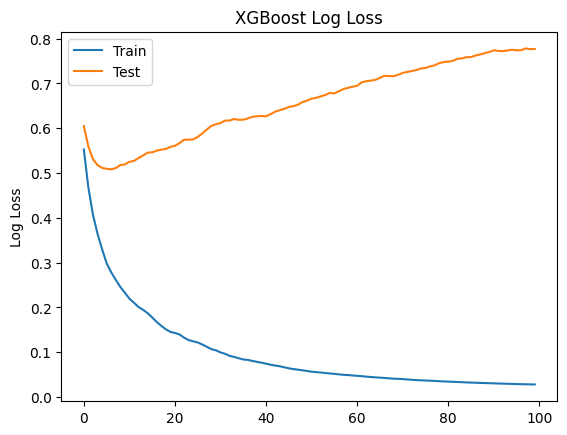

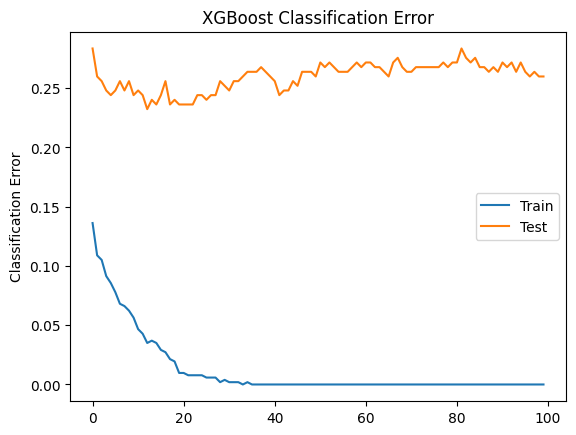

In [2]:
# plot learning curve
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# load data
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# fit model no training data
model = XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

- Running this code reports the classification error on both the train and test datasets each epoch. We can turn this off by setting verbose=False (the default) in the call to the fit() function.

- Two plots are created. The first shows the logarithmic loss of the XGBoost model for each epoch on the training and test datasets.

- The second plot shows the classification error of the XGBoost model for each epoch on the training and test datasets.

- From reviewing the logloss plot, it looks like there is an opportunity to stop the learning early, perhaps somewhere around epoch 20 to epoch 40.

- We see a similar story for classification error, where error appears to go back up at around epoch 40.

### Early Stopping With XGBoost

- XGBoost supports early stopping after a fixed number of iterations.

- In addition to specifying a metric and test dataset for evaluation each epoch, you must specify a window of the number of epochs over which no improvement is observed. This is specified in the early_stopping_rounds parameter.



In [3]:
# early stopping
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load data
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.60491
[1]	validation_0-logloss:0.55934
[2]	validation_0-logloss:0.53068
[3]	validation_0-logloss:0.51795
[4]	validation_0-logloss:0.51153
[5]	validation_0-logloss:0.50934
[6]	validation_0-logloss:0.50818
[7]	validation_0-logloss:0.51097
[8]	validation_0-logloss:0.51760
[9]	validation_0-logloss:0.51912
[10]	validation_0-logloss:0.52503
[11]	validation_0-logloss:0.52697
[12]	validation_0-logloss:0.53335
[13]	validation_0-logloss:0.53905
[14]	validation_0-logloss:0.54545
[15]	validation_0-logloss:0.54613
[16]	validation_0-logloss:0.54982
Accuracy: 74.41%


C:\Users\MaJiD\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\MaJiD\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


- We can see that the model stopped training at epoch 42 (close to what we expected by our manual judgment of learning curves) and that the model with the best loss was observed at epoch 32.

- It is generally a good idea to select the early_stopping_rounds as a reasonable function of the total number of training epochs (10% in this case) or attempt to correspond to the period of inflection points as might be observed on plots of learning curves.

## How to Avoid Overfitting in Deep Learning Neural Networks

- A modern approach to reducing generalization error is to use a larger model that may be required to use regularization during training that keeps the weights of the model small. These techniques not only reduce overfitting, but they can also lead to faster optimization of the model and better overall performance.

### The Problem of Model Generalization and Overfitting

- The objective of a neural network is to have a final model that performs well both on the data that we used to train it (e.g. the training dataset) and the new data on which the model will be used to make predictions.

-  We use methods like a train/test split or k-fold cross-validation only to estimate the ability of the model to generalize to new data.

- An overfit model is easily diagnosed by monitoring the performance of the model during training by evaluating it on both a training dataset and on a holdout validation dataset. Graphing line plots of the performance of the model during training, called learning curves, will show a familiar pattern.

- For example, line plots of the loss (that we seek to minimize) of the model on train and validation datasets will show a line for the training dataset that drops and may plateau and a line for the validation dataset that drops at first, then at some point begins to rise again.

- A learning curve plot tells the story of the model learning the problem until a point at which it begins overfitting and its ability to generalize to the unseen validation dataset begins to get worse.

### Reduce Overfitting by Constraining Model Complexity

- There are two ways to approach an overfit model:

    - Reduce overfitting by training the network on more examples.
    - Reduce overfitting by changing the complexity of the network.

- A benefit of very deep neural networks is that their performance continues to improve as they are fed larger and larger datasets. 

- A model can overfit a training dataset because it has sufficient capacity to do so. Reducing the capacity of the model reduces the likelihood of the model overfitting the training dataset, to a point where it no longer overfits.

- The capacity of a neural network model, it’s complexity, is defined by both it’s structure in terms of nodes and layers and the parameters in terms of its weights. Therefore, we can reduce the complexity of a neural network to reduce overfitting in one of two ways:

    - Change network complexity by changing the network structure (number of weights).
    - Change network complexity by changing the network parameters (values of weights).

- For example, the structure could be tuned such as via grid search until a suitable number of nodes and/or layers is found to reduce or remove overfitting for the problem. Alternately, the model could be overfit and pruned by removing nodes until it achieves suitable performance on a validation dataset.

- It is more common to instead constrain the complexity of the model by ensuring the parameters (weights) of the model remain small. Small parameters suggest a less complex and, in turn, more stable model that is less sensitive to statistical fluctuations in the input data.

- It is more common to focus on methods that constrain the size of the weights in a neural network because a single network structure can be defined that is under-constrained, e.g. has a much larger capacity than is required for the problem, and regularization can be used during training to ensure that the model does not overfit. In such cases, performance can even be better as the additional capacity can be focused on better learning generalizable concepts in the problem.

- Techniques that seek to reduce overfitting (reduce generalization error) by keeping network weights small are referred to as regularization methods. More specifically, regularization refers to a class of approaches that add additional information to transform an ill-posed problem into a more stable well-posed problem.

### Regularization Methods for Neural Networks

- The simplest and perhaps most common regularization method is to add a penalty to the loss function in proportion to the size of the weights in the model.

    - Weight Regularization (weight decay): Penalize the model during training based on the magnitude of the weights.

- This will encourage the model to map the inputs to the outputs of the training dataset in such a way that the weights of the model are kept small. This approach is called weight regularization or weight decay and has proven very effective for decades for both simpler linear models and neural networks.

- Below is a list of five of the most common additional regularization methods.

    - Activity Regularization: Penalize the model during training base on the magnitude of the activations.
    - Weight Constraint: Constrain the magnitude of weights to be within a range or below a limit.
    - Dropout: Probabilistically remove inputs during training.
    - Noise: Add statistical noise to inputs during training.
    - Early Stopping: Monitor model performance on a validation set and stop training when performance degrades.

- Most of these methods have been demonstrated (or proven) to approximate the effect of adding a penalty to the loss function.

### Regularization Recommendations

- You should always consider using regularization, unless you have a very large dataset, e.g. big-data scale.

- A good general recommendation is to design a neural network structure that is under-constrained and to use regularization to reduce the likelihood of overfitting.

- Early stopping should almost universally be used in addition to a method to keep weights small during training.

- Some more specific recommendations include:

    - Classical: use early stopping and weight decay (L2 weight regularization).
    - Alternate: use early stopping and added noise with a weight constraint.
    - Modern: use early stopping and dropout, in addition to a weight constraint.

- These recommendations would suit Multilayer Perceptrons and Convolutional Neural Networks.

- Some recommendations for recurrent neural nets include:

    - Classical: use early stopping with added weight noise and a weight constraint such as maximum norm.
    - Modern: use early stopping with a backpropagation-through-time-aware version of dropout and a weight constraint.



## How to Use Weight Decay to Reduce Overfitting of Neural Network in Keras

- Weight regularization provides an approach to reduce the overfitting of a deep learning neural network model on the training data and improve the performance of the model on new data, such as the holdout test set.

- There are multiple types of weight regularization, such as L1 and L2 vector norms, and each requires a hyperparameter that must be configured.

### Weight Regularization API in Keras

- Keras provides a weight regularization API that allows you to add a penalty for weight size to the loss function.

- Three different regularizer instances are provided; they are:

    - L1: Sum of the absolute weights.
    - L2: Sum of the squared weights.
    - L1L2: Sum of the absolute and the squared weights.

- The regularizers are provided under keras.regularizers and have the names l1, l2 and l1_l2. Each takes the regularizer hyperparameter as an argument.

- By default, no regularizer is used in any layers.

- A weight regularizer can be added to each layer when the layer is defined in a Keras model.

- This is achieved by setting the kernel_regularizer argument on each layer. A separate regularizer can also be used for the bias via the bias_regularizer argument, although this is less often used.

### Weight Regularization for Dense Layers

- The example below sets an l2 regularizer on a Dense fully connected layer:

In [ ]:
# example of l2 on a dense layer
from keras.layers import Dense
from keras.regularizers import l2
...
model.add(Dense(32, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
...

### Weight Regularization for Convolutional Layers

- Like the Dense layer, the Convolutional layers (e.g. Conv1D and Conv2D) also use the kernel_regularizer and bias_regularizer arguments to define a regularizer.

- The example below sets an l2 regularizer on a Conv2D convolutional layer:

In [ ]:
# example of l2 on a convolutional layer
from keras.layers import Conv2D
from keras.regularizers import l2
...
model.add(Conv2D(32, (3,3), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
...


### Weight Regularization for Recurrent Layers

- Recurrent layers like the LSTM offer more flexibility in regularizing the weights.

- The input, recurrent, and bias weights can all be regularized separately via the kernel_regularizer, recurrent_regularizer, and bias_regularizer arguments.

- The example below sets an l2 regularizer on an LSTM recurrent layer:

In [ ]:
# example of l2 on an lstm layer
from keras.layers import LSTM
from keras.regularizers import l2
...
model.add(LSTM(32, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
...

### Examples of MLP Weight Regularization

- Weight regularization was borrowed from penalized regression models in statistics.

- The most common type of regularization is L2, also called simply “weight decay,” with values often on a logarithmic scale between 0 and 0.1, such as 0.1, 0.001, 0.0001, etc.

### Examples of CNN Weight Regularization

- Weight regularization does not seem widely used in CNN models, or if it is used, its use is not widely reported.

- L2 weight regularization with very small regularization hyperparameters such as (e.g. 0.0005 or 5 x 10^−4) may be a good starting point.

### Examples of LSTM Weight Regularization

It is common to use weight regularization with LSTM models.

An often used configuration is L2 (weight decay) and very small hyperparameters (e.g. 10^−6). It is often not reported what weights are regularized (input, recurrent, and/or bias), although one would assume that both input and recurrent weights are regularized only.

### Weight Regularization Case Study

#### Binary Classification Problem

- We will use a standard binary classification problem that defines two semi-circles of observations: one semi-circle for each class.

- Each observation has two input variables with the same scale and a class output value of either 0 or 1. This dataset is called the “moons” dataset because of the shape of the observations in each class when plotted.

- We can use the make_moons() function to generate observations from this problem. We will add noise to the data and seed the random number generator so that the same samples are generated each time the code is run

- We can plot the dataset where the two variables are taken as x and y coordinates on a graph and the class value is taken as the color of the observation.

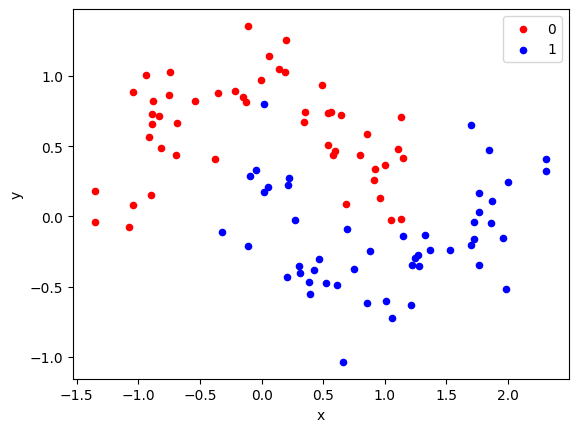

In [4]:
# generate two moons dataset
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

- This is a good test problem because the classes cannot be separated by a line, e.g. are not linearly separable, requiring a nonlinear method such as a neural network to address.

- We have only generated 100 samples, which is small for a neural network, providing the opportunity to overfit the training dataset and have higher error on the test dataset: a good case for using regularization. Further, the samples have noise, giving the model an opportunity to learn aspects of the samples that don’t generalize.

#### Overfit Multilayer Perceptron Model

- We can develop an MLP model to address this binary classification problem.

- The model will have one hidden layer with more nodes that may be required to solve this problem, providing an opportunity to overfit. We will also train the model for longer than is required to ensure the model overfits.

- Before we define the model, we will split the dataset into train and test sets, using 30 examples to train the model and 70 to evaluate the fit model’s performance.

- The model uses 500 nodes in the hidden layer and the rectified linear activation function.

- A sigmoid activation function is used in the output layer in order to predict class values of 0 or 1.

- The model is optimized using the binary cross entropy loss function, suitable for binary classification problems and the efficient Adam version of gradient descent

- The defined model is then fit on the training data for 4,000 epochs and the default batch size of 32.

- Finally, we can evaluate the performance of the model on the test dataset and report the result.

In [5]:
# overfit mlp for the moons dataset
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
model.fit(trainX, trainy, epochs=4000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.914


- We can see that the model has better performance on the training dataset than the test dataset, one possible sign of overfitting.

- Another sign of overfitting is a plot of the learning curves of the model for both train and test datasets while training.

- An overfit model should show accuracy increasing on both train and test and at some point accuracy drops on the test dataset but continues to rise on the training dataset.

- We can update the example to plot these curves

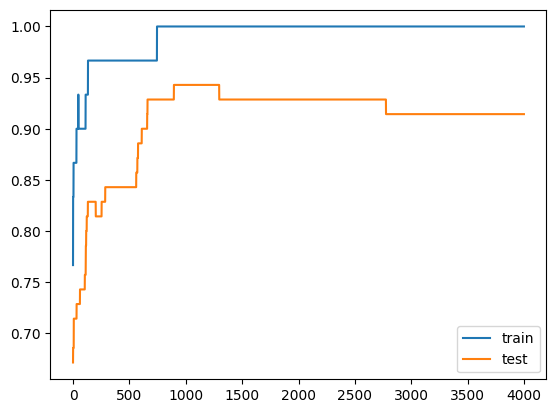

In [6]:
# overfit mlp for the moons dataset plotting history
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# plot history
# summarize history for accuracy
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

- We can see an expected shape of an overfit model where test accuracy increases to a point and then begins to decrease again.

### MLP Model With Weight Regularization

- We can add weight regularization to the hidden layer to reduce the overfitting of the model to the training dataset and improve the performance on the holdout set.

- We will use the L2 vector norm also called weight decay with a regularization parameter (called alpha or lambda) of 0.001, chosen arbitrarily.

In [ ]:
# mlp with weight regularization for the moons dataset
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l2
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
model.fit(trainX, trainy, epochs=4000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

- We can see no change in the accuracy on the training dataset and an improvement on the test dataset.

- We would expect that the telltale learning curve for overfitting would also have been changed through the use of weight regularization.

- Instead of the accuracy of the model on the test set increasing and then decreasing again, we should see it continually rise during training.

In [ ]:
# mlp with weight regularization for the moons dataset plotting history
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l2
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# plot history
# summarize history for accuracy
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

- As expected, we see the learning curve on the test dataset rise and then plateau, indicating that the model may not have overfit the training dataset.

#### Grid Search Regularization Hyperparameter

- Once you can confirm that weight regularization may improve your overfit model, you can test different values of the regularization parameter.

- It is a good practice to first grid search through some orders of magnitude between 0.0 and 0.1, then once a level is found, to grid search on that level.

- We can grid search through the orders of magnitude by defining the values to test, looping through each and recording the train and test performance.

- Once we have all of the values, we can graph the results as a line plot to help spot any patterns in the configurations to the train and test accuracies.

- Because parameters jump orders of magnitude (powers of 10), we can create a line plot of the results using a logarithmic scale. The Matplotlib library allows this via the semilogx() function. For example:

In [ ]:
# grid search regularization values for moons dataset
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l2
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# grid search values
values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
all_train, all_test = list(), list()
for param in values:
	# define model
	model = Sequential()
	model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=l2(param)))
	model.add(Dense(1, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit model
	model.fit(trainX, trainy, epochs=4000, verbose=0)
	# evaluate the model
	_, train_acc = model.evaluate(trainX, trainy, verbose=0)
	_, test_acc = model.evaluate(testX, testy, verbose=0)
	print('Param: %f, Train: %.3f, Test: %.3f' % (param, train_acc, test_acc))
	all_train.append(train_acc)
	all_test.append(test_acc)
# plot train and test means
pyplot.semilogx(values, all_train, label='train', marker='o')
pyplot.semilogx(values, all_test, label='test', marker='o')
pyplot.legend()
pyplot.show()

- The results suggest that 0.01 or 0.001 may be sufficient and may provide good bounds for further grid searching.

- A line plot of the results is also created, showing the increase in test accuracy with larger weight regularization parameter values, at least to a point.

- We can see that using the largest value of 0.1 results in a large drop in both train and test accuracy.

## How to Reduce Overfitting With Dropout Regularization in Keras

- Dropout regularization is a computationally cheap way to regularize a deep neural network.

- Dropout works by probabilistically removing, or “dropping out,” inputs to a layer, which may be input variables in the data sample or activations from a previous layer. It has the effect of simulating a large number of networks with very different network structure and, in turn, making nodes in the network generally more robust to the inputs.

### Dropout Regularization in Keras

- Keras supports dropout regularization.

- The simplest form of dropout in Keras is provided by a Dropout core layer.

- When created, the dropout rate can be specified to the layer as the probability of setting each input to the layer to zero. This is different from the definition of dropout rate from the papers, in which the rate refers to the probability of retaining an input.

- Therefore, when a dropout rate of 0.8 is suggested in a paper (retain 80%), this will, in fact, will be a dropout rate of 0.2 (set 20% of inputs to zero).

#### Dropout Regularization on Layers

- The Dropout layer is added to a model between existing layers and applies to outputs of the prior layer that are fed to the subsequent layer.

In [ ]:
...
model.append(Dense(32))
model.append(Dropout(0.5))
model.append(Dense(32))
...

- Dropout can also be applied to the visible layer, e.g. the inputs to the network.

- This requires that you define the network with the Dropout layer as the first layer and add the input_shape argument to the layer to specify the expected shape of the input samples.

In [ ]:
...
model.add(Dropout(0.5, input_shape=(2,)))
...

### MLP Dropout Regularization

The example below adds dropout between two dense fully connected layers.

In [ ]:
# example of dropout between fully connected layers
from keras.layers import Dense
from keras.layers import Dropout
...
model.add(Dense(32))
model.add(Dropout(0.5))
model.add(Dense(1))
...

#### CNN Dropout Regularization

Dropout can be used after convolutional layers (e.g. Conv2D) and after pooling layers (e.g. MaxPooling2D).

- Often, dropout is only used after the pooling layers, but this is just a rough heuristic.

In [ ]:
# example of dropout for a CNN
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
...
model.add(Conv2D(32, (3,3)))
model.add(Conv2D(32, (3,3)))
model.add(MaxPooling2D())
model.add(Dropout(0.5))
model.add(Dense(1))
...

#### RNN Dropout Regularization

The example below adds dropout between two layers: an LSTM recurrent layer and a dense fully connected layers.

In [ ]:
# example of dropout between LSTM and fully connected layers
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
...
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1))
...

- This example applies dropout to, in this case, 32 outputs from the LSTM layer provided as input to the Dense layer.

- Alternately, the inputs to the LSTM may be subjected to dropout. In this case, a different dropout mask is applied to each time step within each sample presented to the LSTM.

In [ ]:
# example of dropout before LSTM layer
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
...
model.add(Dropout(0.5, input_shape=(...)))
model.add(LSTM(32))
model.add(Dense(1))
...

- There is an alternative way to use dropout with recurrent layers like the LSTM. The same dropout mask may be used by the LSTM for all inputs within a sample. The same approach may be used for recurrent input connections across the time steps of the sample. This approach to dropout with recurrent models is called a Variational RNN.

- Keras supports Variational RNNs (i.e. consistent dropout across the time steps of a sample for inputs and recurrent inputs) via two arguments on the recurrent layers, namely “dropout” for inputs and “recurrent_dropout” for recurrent inputs.

In [ ]:
# example of variational LSTM dropout
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
...
model.add(LSTM(32, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(1))
...

#### Dropout Regularization Case Study

In this section, we will demonstrate how to use dropout regularization to reduce overfitting of an MLP on a simple binary classification problem.

### Binary Classification Problem

We will use a standard binary classification problem that defines two two-dimensional concentric circles of observations, one circle for each class.

Each observation has two input variables with the same scale and a class output value of either 0 or 1. This dataset is called the “circles” dataset because of the shape of the observations in each class when plotted.

We can use the make_circles() function to generate observations from this problem. We will add noise to the data and seed the random number generator so that the same samples are generated each time the code is run.

We can plot the dataset where the two variables are taken as x and y coordinates on a graph and the class value is taken as the color of the observation.

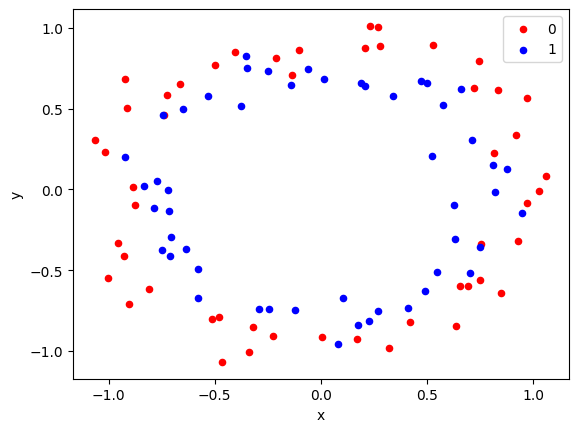

In [7]:
# generate two circles dataset
from sklearn.datasets import make_circles
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

This is a good test problem because the classes cannot be separated by a line, e.g. are not linearly separable, requiring a nonlinear method such as a neural network to address.

We have only generated 100 samples, which is small for a neural network, providing the opportunity to overfit the training dataset and have higher error on the test dataset: a good case for using regularization. Further, the samples have noise, giving the model an opportunity to learn aspects of the samples that don’t generalize.

### Overfit Multilayer Perceptron

We can develop an MLP model to address this binary classification problem.

The model will have one hidden layer with more nodes than may be required to solve this problem, providing an opportunity to overfit. We will also train the model for longer than is required to ensure the model overfits.

Before we define the model, we will split the dataset into train and test sets, using 30 examples to train the model and 70 to evaluate the fit model’s performance.

The hidden layer uses 500 nodes in the hidden layer and the rectified linear activation function. A sigmoid activation function is used in the output layer in order to predict class values of 0 or 1.

The model is optimized using the binary cross entropy loss function, suitable for binary classification problems and the efficient Adam version of gradient descent.

The defined model is then fit on the training data for 4,000 epochs and the default batch size of 32.

We can evaluate the performance of the model on the test dataset and report the result.

Finally, we will plot the performance of the model on both the train and test set each epoch.

If the model does indeed overfit the training dataset, we would expect the line plot of accuracy on the training set to continue to increase and the test set to rise and then fall again as the model learns statistical noise in the training dataset.

Train: 1.000, Test: 0.771


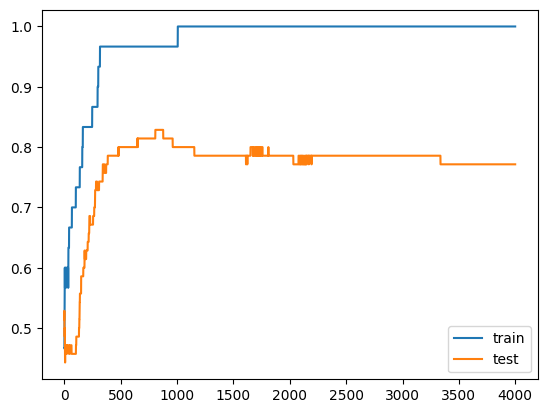

In [8]:
# mlp overfit on the two circles dataset
from sklearn.datasets import make_circles
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

We can see that the model has better performance on the training dataset than the test dataset, one possible sign of overfitting.

A figure is created showing line plots of the model accuracy on the train and test sets.

We can see that expected shape of an overfit model where test accuracy increases to a point and then begins to decrease again.

### Overfit MLP With Dropout Regularization

We can update the example to use dropout regularization.

We can do this by simply inserting a new Dropout layer between the hidden layer and the output layer. In this case, we will specify a dropout rate (probability of setting outputs from the hidden layer to zero) to 40% or 0.4.

In [ ]:
# mlp with dropout on the two circles dataset
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In this specific case, we can see that dropout resulted in a slight drop in accuracy on the training dataset, down from 100% to 96%, and a lift in accuracy on the test set, up from 75% to 81%.

Reviewing the line plot of train and test accuracy during training, we can see that it no longer appears that the model has overfit the training dataset.

Model accuracy on both the train and test sets continues to increase to a plateau, albeit with a lot of noise given the use of dropout during training.